In [1]:
from astropy.io import fits
import numpy as np
import astropy
from astropy.table import Table
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats 
from scipy.optimize import curve_fit

from matplotlib.backends.backend_pdf import PdfPages

In [29]:
file_path = '/home/arya/Desktop/Det_gain_offset_merged_data/det1/pixel_fit_parameters_det1.fits'
hdulist = fits.open(file_path)
data = Table.read(file_path)

In [31]:
data = hdulist[1].data
print(Table(data))

pixid         gain               offset      
----- -------------------- ------------------
    0  0.05427333220209298  10.72288921077397
    1   0.0546645896836817   10.4186141471977
    2 0.054031891393968405 10.702035230370676
    3 0.053890159083091006    9.6608529205857
    4  0.05271641181826664 11.161060999188718
    5   0.0545997922495445  9.833323441420093
    6  0.05329557088898514 10.397724694480454
    7  0.05344742141967042  9.399930951377522
    8 0.053731878151198065 6.4834146985940295
    9  0.05439963748660677 6.9601885312695115
  ...                  ...                ...
  246 0.052620940498585136  6.719772770289324
  247 0.051982884445880666  8.108181754755075
  248 0.053218556725969944  7.447963289277055
  249  0.05375209015891234  6.267338323267984
  250  0.05222366359206381  7.552520422770083
  251  0.05340725912861845  7.716720282383515
  252  0.05340725912861845  7.716720282383515
  253  0.05340725912861845  7.716720282383515
  254  0.05340725912861845  7.7167

det id = 1


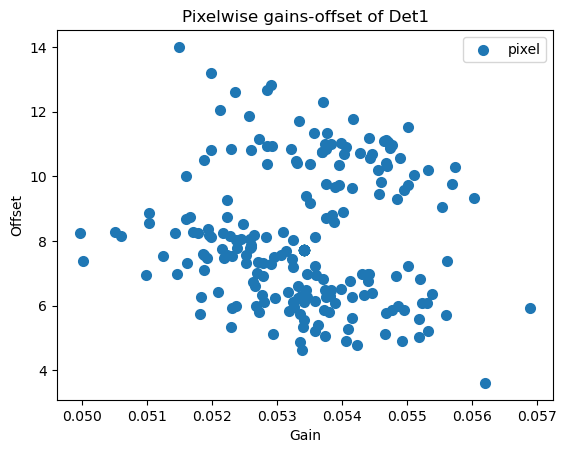

In [33]:
plt.scatter(data['gain'],data["offset"], lw=2, label= "pixel")
# plt.ylim(0,20)
# plt.xlim(0.04,0.06)
detid = input("det id =")
# Add labels and title
plt.xlabel('Gain')
plt.ylabel('Offset')
plt.title(f'Pixelwise gains-offset of Det{detid}')
plt.legend()

# Show the plot
plt.savefig(f'/home/arya/Desktop/Det_gain_offset_merged_data/det{detid}/gain-offset_plot_D{detid}.pdf', format='pdf')

TypeError: Value after * must be an iterable, not NoneType

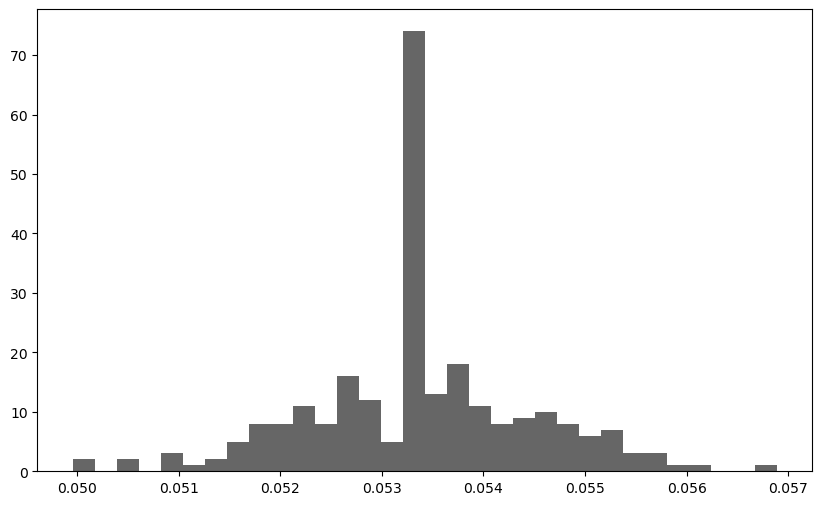

In [35]:
N, bins = np.histogram(data["gain"], bins= 32)
bin_centers = (bins[:-1] + bins[1:]) / 2

def gauss(x,amp,mean,stdev):
    return amp*np.exp(-(x-mean)**2/(2*stdev**2))


# Initialize variables for fitting
p0 = [np.max(N), np.mean(data['gain']), np.std(data['gain'])]
params = None
pcov = None
        
for i in range(10):
    try:
        # Fit the Gaussian function to the histogram data
        params, pcov = curve_fit(gauss, bin_centers, N, p0, maxfev=200)
        
        # Check if the change in parameters is within the acceptable range
        if np.all((np.abs(p0 - params) / np.sqrt(np.diag(pcov))) >1):
            break
        
        # Update initial guess for next iteration
        p0 = params
    except RuntimeError:
        # If the fit fails, continue to the next iteration
        continue
# Step 5: Plot the histogram and the fitted Gaussian curve
plt.figure(figsize=(10, 6))

# Plot the histogram
plt.hist(data["gain"], bins=32, alpha=0.6, color='k', label= "Gain")

# Plot the Gaussian fit
x_fit = np.linspace(bin_centers[0], bin_centers[-1], 1000)
y_fit = gauss(x_fit, *params)
label_text = f'Fitted Gain ={params[1]:.4g}'
plt.plot(x_fit, y_fit, color='r', lw=2, label=label_text)
# plt.xlim(0.04,0.06)



# Add labels and title
plt.xlabel(f'Gain distribution of detector{detid}')
plt.ylabel('Frequency')
plt.title(f'Pixelwise gains of Det{detid}')
plt.legend()
# Show the plot
plt.savefig(f'/home/arya/Desktop/Det_gain_offset_merged_data/det{detid}/fitted_gain_plot_D{detid}.pdf', format='pdf')
gain = params[1]
gain, params[1]-5*params[2],params[1]+5*params[2]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Your existing data and histogram calculations
N, bins = np.histogram(data["offset"], bins=32)
bin_centers = (bins[:-1] + bins[1:]) / 2

def gauss(x, amp, mean, stdev):
    return amp * np.exp(-(x - mean) ** 2 / (2 * stdev ** 2))

# Initialize variables for fitting
p0 = [np.max(N), np.mean(data['offset']), np.std(data['offset'])]
params = None
pcov = None

for i in range(10):
    try:
        # Fit the Gaussian function to the histogram data
        params, pcov = curve_fit(gauss, bin_centers, N, p0, maxfev=200)
        
        # Check if the change in parameters is within the acceptable range
        if np.all((np.abs(p0 - params) / np.sqrt(np.diag(pcov))) > 1):
            break
        
        # Update initial guess for next iteration
        p0 = params
    except RuntimeError:
        # If the fit fails, continue to the next iteration
        continue

# Extract the fitted parameters
offset_mean = params[1]
offset_stdev = params[2]

# Define the 5-sigma range
lower_bound = offset_mean - 5 * offset_stdev
upper_bound = offset_mean + 5 * offset_stdev

# Filter the data to include only the points within the 5-sigma range
filtered_data = data[(data["offset"] >= lower_bound) & (data["offset"] <= upper_bound)]

# Plotting the histogram and the fitted Gaussian curve
plt.figure(figsize=(10, 6))

# Plot the histogram
plt.hist(data["offset"], bins=32, alpha=0.6, color='k', label="Offset")

# Plot the Gaussian fit
x_fit = np.linspace(bin_centers[0], bin_centers[-1], 1000)
y_fit = gauss(x_fit, *params)
label_text = f'Fitted Offset = {params[1]:.4g}'
plt.plot(x_fit, y_fit, color='r', lw=2, label=label_text)
plt.xlim(0, 20)

# Add labels and title
plt.xlabel(f'Offset distribution of detector {detid}')
plt.ylabel('Frequency')
plt.title(f'Pixelwise offsets of Det {detid}')
plt.legend()

# Show the plot
plt.savefig(f'/home/arya/Desktop/Det_gain_offset_merged_data/det{detid}/fitted_offset_plot_D{detid}.pdf', format='pdf')

# Return the offset and 5-sigma range
#offset, lower_bound, upper_bound

# Now 'filtered_data' contains the data within the 5-sigma range


In [38]:
from astropy.stats import sigma_clip, sigma_clipped_stats

0.053403539807093385 0.05340725912861845 0.001028542925302275


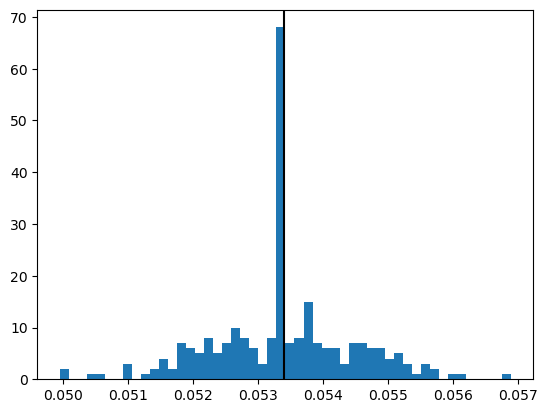

In [40]:
# filtered_data = sigma_clip(data['gain'], sigma=1)
mean, median, stddev = sigma_clipped_stats(data['gain'], sigma=3)
plt.hist(data['gain'], bins=50)
# plt.hist(filtered_data.data, color="C1")
# plt.axvline(np.mean(filtered_data.data), c='k')
# np.mean(filtered_data.data)
plt.axvline(mean, c='k')
# Add labels and title

# Show the plot
#plt.savefig(f'/home/arya/Desktop/Det_gain_offset_merged_data/det{detid}/fitted_gain_plot_D{detid}.pdf', format='pdf')
print(mean, median, stddev)
gain = median

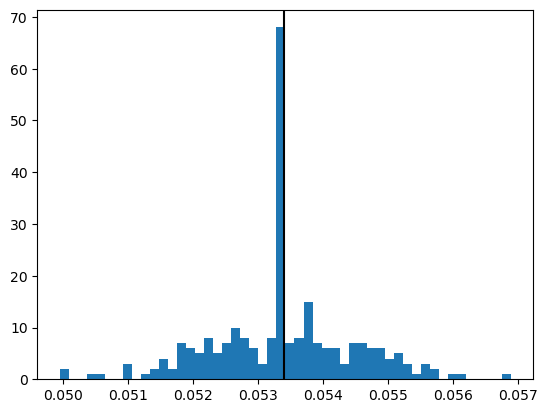

In [42]:
filtered_data = sigma_clip(data['gain'], sigma=5)
data['gain'][np.where(filtered_data.mask == True)[0]] = gain
data[np.where(filtered_data.mask == True)[0]]

plt.hist(data['gain'], bins=50)
plt.axvline(np.median(filtered_data.data), c='k')

8.007392132721487 7.716720282383515 1.8519911560775375


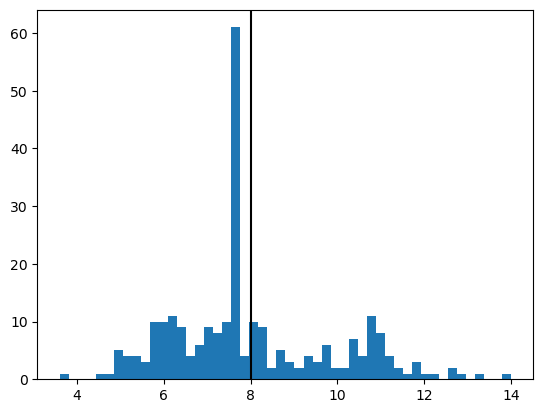

In [44]:
mean, median, stddev = sigma_clipped_stats(data['offset'], sigma=3)
plt.hist(data['offset'], bins=50)
# plt.hist(filtered_data.data, color="C1")
# plt.axvline(np.mean(filtered_data.data), c='k')
# np.mean(filtered_data.data)
plt.axvline(mean, c='k')
print(mean, median, stddev)
offset = median

[]


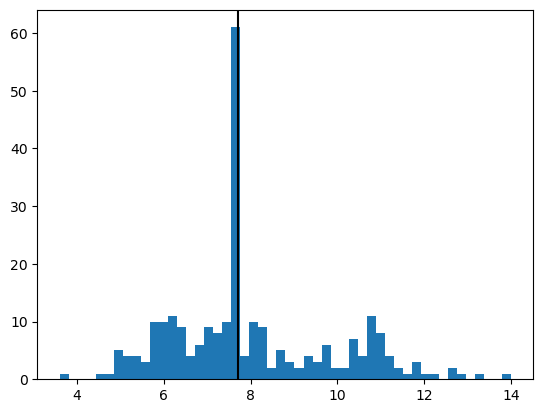

In [46]:
filtered_data = sigma_clip(data['offset'], sigma=5)
data['offset'][np.where(filtered_data.mask == True)[0]] = offset
print(data[np.where(filtered_data.mask == True)[0]])

plt.hist(data['offset'], bins=50)
plt.axvline(np.median(filtered_data.data), c='k')

In [48]:
#updating the data
# Extract pixel numbers
pixel_numbers = data['pixid']

# Define the range of expected pixel numbers
expected_pixels = np.arange(0, 256)

# Find missing pixels
missing_pixels = np.setdiff1d(expected_pixels, pixel_numbers)
missing_pixels,len(missing_pixels)

(array([], dtype=int64), 0)

In [50]:
given_gain = gain
given_offset = offset

# Create new entries for the missing pixels
new_entries = np.zeros(len(missing_pixels), dtype=data.dtype)

new_entries['pixid'] = missing_pixels
new_entries['gain'] = given_gain
new_entries['offset'] = given_offset

# Combine original data with new entries
combined_data = np.concatenate((data, new_entries))

# Sort by pixel number to maintain order
combined_data = np.sort(combined_data, order='pixid')
print(Table(combined_data))

pixid         gain               offset      
----- -------------------- ------------------
    0  0.05427333220209298  10.72288921077397
    1   0.0546645896836817   10.4186141471977
    2 0.054031891393968405 10.702035230370676
    3 0.053890159083091006    9.6608529205857
    4  0.05271641181826664 11.161060999188718
    5   0.0545997922495445  9.833323441420093
    6  0.05329557088898514 10.397724694480454
    7  0.05344742141967042  9.399930951377522
    8 0.053731878151198065 6.4834146985940295
    9  0.05439963748660677 6.9601885312695115
  ...                  ...                ...
  246 0.052620940498585136  6.719772770289324
  247 0.051982884445880666  8.108181754755075
  248 0.053218556725969944  7.447963289277055
  249  0.05375209015891234  6.267338323267984
  250  0.05222366359206381  7.552520422770083
  251  0.05340725912861845  7.716720282383515
  252  0.05340725912861845  7.716720282383515
  253  0.05340725912861845  7.716720282383515
  254  0.05340725912861845  7.7167

In [52]:
def create_update(outfile, table): 
    
    # Convert the table to a BinTableHDU
    table_hdu = fits.BinTableHDU(table)    
    # Create a PrimaryHDU
    primary_hdu = fits.PrimaryHDU()    
    # # Add metadata
    # primary_hdu.header['DETID'] = DET_ID    
    # Combine HDUs into an HDUList
    hdulist = fits.HDUList([primary_hdu, table_hdu])    
    
    hdulist.writeto(outfile, overwrite=True)
#update
create_update(file_path, combined_data)